<a href="https://colab.research.google.com/github/gyanaranjans/random_forest_and_K_fold_cross_validation/blob/main/Handwritten_number_by_nural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

11490434/11490434 [==============================] - 0s 0us/step


60000

In [4]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

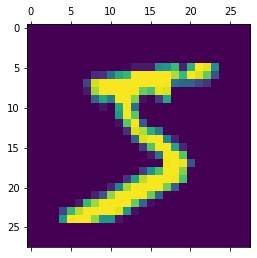

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
from tensorflow.python import metrics
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4709 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9260


In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened =X_test.reshape(len(X_test),28*28)

In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.9247


[0.27010446786880493, 0.9247000217437744]

In [16]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.1841634e-02, 4.7777303e-07, 9.4588839e-02, 9.5751923e-01,
       2.8125527e-03, 1.3053611e-01, 2.6417395e-06, 9.9976432e-01,
       6.3541301e-02, 6.9401437e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

In [22]:
cm =tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    5,   11,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    7,  955,   14,    9,    3,   12,    8,   17,    4],
       [   2,    0,   29,  918,    1,   27,    2,    7,   14,   10],
       [   1,    1,    7,    1,  905,    0,   11,    3,    7,   46],
       [   8,    2,    5,   31,   10,  779,   21,    5,   23,    8],
       [   7,    3,    7,    1,    7,    7,  924,    2,    0,    0],
       [   1,    5,   31,    5,    9,    1,    0,  933,    1,   42],
       [   8,    9,   13,   29,    8,   39,   12,    9,  830,   17],
       [  10,    7,    2,   10,   26,    8,    0,   14,    3,  929]],
      dtype=int32)>

In [20]:
y_predicted_labels =[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

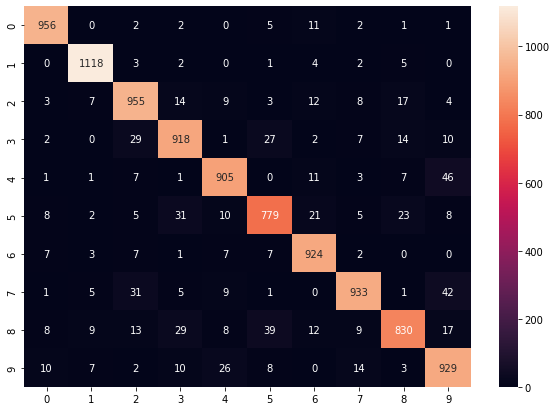

In [24]:
import seaborn as sn 
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot= True,fmt='d')


In [25]:
from tensorflow.python import metrics
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2761 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1248 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0653 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9839


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0848 - accuracy: 0.9759


[0.08477919548749924, 0.9758999943733215]

313/313 [==============================] - 1s 3ms/step


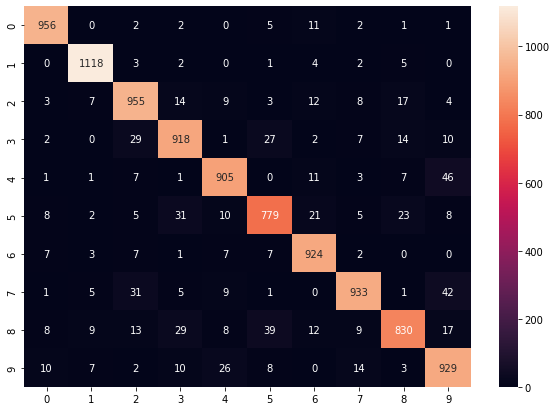

In [27]:
y_predicted_labels =[np.argmax(i) for i in y_predicted]
y_predicted=model.predict(X_test_flattened)
cm =tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
import seaborn as sn 
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot= True,fmt='d')


In [29]:
from tensorflow.python import metrics
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2773 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1262 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0889 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0542 - accuracy: 0.9836
